## __Titanic dataset__

`Source`: https://www.kaggle.com/datasets/waqi786/titanic-dataset

- PassengerID: Unique identifier for each passenger.
- Pclass: Passenger class (1st, 2nd, 3rd).
- Name: Full name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Ticket fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- Survived: Survival status (0 = No; 1 = Yes).

__Usage:__
This dataset is ideal for practice in classification tasks, particularly for predicting binary outcomes such as survival status.

__Aim of the dataset:__ is to classify whether a person survived in Titanic or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### __Loading the dataset and checking the structure of the data__

- Finding missing values.
- Checking for categorical variables.
- Imputing the missing values with `mean` or `median` for numerical values.
- Imputing the missing values with `mode` for categorical values.
- Dropping columns which have too many missing values.

In [2]:
# Load the Titanic dataset from URL

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### __Observations:__

- Here, minimum and maximum values of `Age` ranges from 0.42 to 80.
- For that reason, we can find outliers in the dataset within the `Age` column.
- Hence, taking the mean value will not be proper because of the presence of outliers.
- We will use Median.

In [7]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Check for missing values

titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#### __Observations:__

- Columns `Age`, `Cabin` and `Embarked` have missing values.
- `Age` is a numerical column.
- `Cabin` has too many missing values.
- `Sex`, `Embarked`, `Pclass` are categorical variables.

In [9]:
# Check the categories in the categorical variables.

titanic_df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [10]:
titanic_df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [11]:
titanic_df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


#### __Observations__

- For categorical variables, we will use the mode i.e. the category having highest count.
- For `Embarked`, it will be `S`.
- Since, `Cabin` has too many missing values, we can drop the column from the dataset.

In [12]:
titanic_df['Embarked'].mode()[0]

'S'

In [13]:
titanic_df['Age'].median()

28.0

In [14]:
# Handle missing values in Age by imputing the median

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [15]:
# Handle missing values in Embarked by imputing the mode

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [16]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# Since Cabin has too many missing values, we can drop the column
# Dropping Passengers, Name, Ticket column as its not needed

titanic_df.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [19]:
# Drop rows with missing target values (Survived)

titanic_df.dropna(subset=['Survived'], inplace=True)

In [20]:
# Encode Categorical variables

label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

In [21]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### __Finding the outliers in the data using Box Plot__

- Finding the outliers in the dataset.
- Removing them.

<Axes: ylabel='Age'>

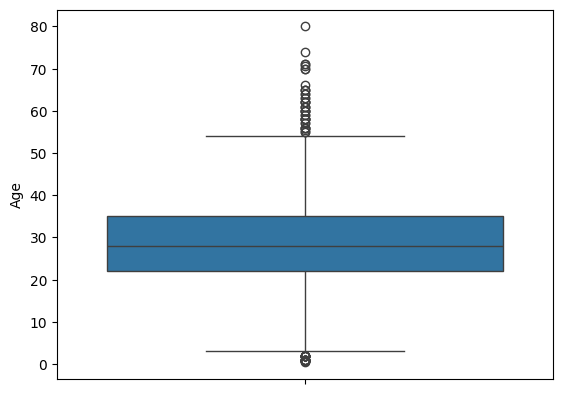

In [22]:
sns.boxplot(y = titanic_df["Age"])

<Axes: ylabel='Fare'>

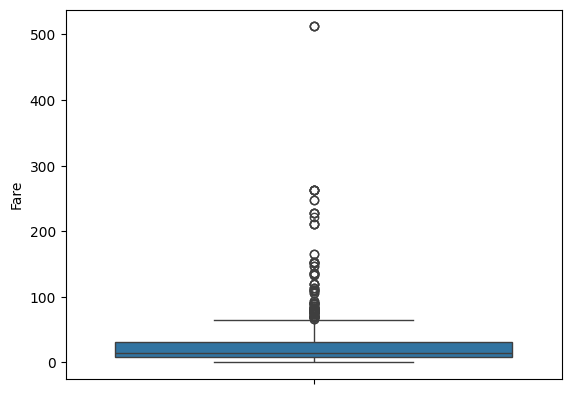

In [23]:
sns.boxplot(y = titanic_df["Fare"])

#### __Observations:__

- Here, `Age` and `Fare` contain outliers.

### __Removing outliers from Fare__

In [24]:
# Calculate Q1, Q3 and IQR For Fare

Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

7.9104 31.0 23.0896


In [25]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR

outliers = titanic_df[(titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fare':", len(outliers))

Number of outliers in 'fare': 116


In [26]:
# Removing outliers

titanic_df_clean = titanic_df[~((titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", titanic_df_clean.shape)

Data shape after outlier removal: (775, 8)


<Axes: ylabel='Fare'>

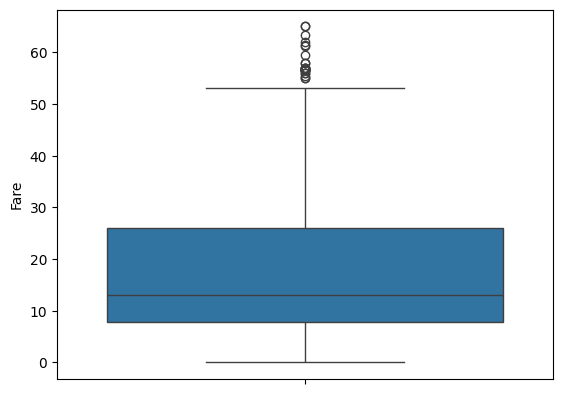

In [27]:
sns.boxplot(y = titanic_df_clean["Fare"])

### __Removing outliers from Age__

In [28]:
# Calculate Q1, Q3 and IQR For Age

Q1 = titanic_df_clean['Age'].quantile(0.25)
Q3 = titanic_df_clean['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

22.0 34.0 12.0


In [29]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR

outliers = titanic_df_clean[(titanic_df_clean['Age'] < (Q1 - 1.5 * IQR)) | (titanic_df_clean['Age'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'age':", len(outliers))

Number of outliers in 'age': 67


In [30]:
# Removing outliers

titanic_df_clean = titanic_df_clean[~((titanic_df_clean['Age'] < (Q1 - 1.5 * IQR)) | (titanic_df_clean['Age'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", titanic_df_clean.shape)

Data shape after outlier removal: (708, 8)


<Axes: ylabel='Age'>

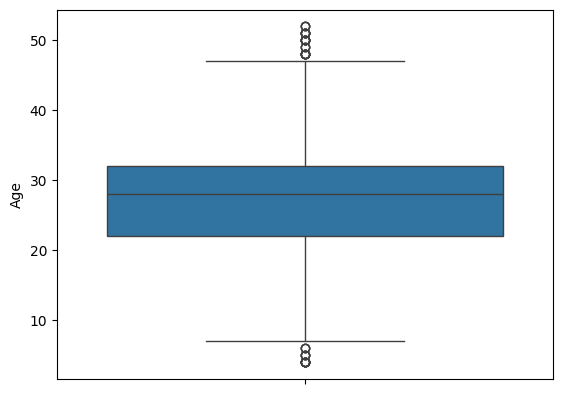

In [31]:
sns.boxplot(y = titanic_df_clean["Age"])

### __Performing Vertical and Horizontal split of the data and scaling the data__

In [32]:
X = titanic_df_clean.drop(columns = "Survived")
y = titanic_df_clean["Survived"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,28.0,0,0,26.55,2
784,3,1,25.0,0,0,7.05,2
83,1,1,28.0,0,0,47.10,2
17,2,1,28.0,0,0,13.00,2
323,2,0,22.0,1,1,29.00,2


In [35]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
147,3,0,9.0,2,2,34.3750,2
313,3,1,28.0,0,0,7.8958,2
417,2,0,18.0,0,2,13.0000,2
251,3,0,29.0,1,1,10.4625,2
766,1,1,28.0,0,0,39.6000,0


### __Scaling the dataset__

In [36]:
# Scale the numerical columns
scaler = StandardScaler()
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [37]:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### __Model creation (Logistic Regression)__

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Setting up the Logistic Regression classifier
logistic_reg = LogisticRegression(random_state=42)

# Defining the parameters for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 500, 1000]
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, error_score=0)
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_lr = grid_search.best_estimator_

# Predict on the training and testing set
y_pred_train_log_reg = best_lr.predict(X_train)
y_pred_test_log_reg = best_lr.predict(X_test)

y_pred_test_proba_log_reg = best_lr.predict_proba(X_test)[:,1]

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)

print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Logistic Regression
Training Accuracy: 0.804040404040404
Testing Accuracy: 0.8028169014084507


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(s

In [40]:
results_df_log_reg = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_log_reg,
    'Predicted Label': y_pred_test_log_reg,
})

# Display the first 5 instances in the result dataframe
results_df_log_reg.head()

,Actual Label,Predicted Probability,Predicted Label
147,0,0.580382,1
313,0,0.091207,0
417,1,0.737514,1
251,0,0.454344,0
766,0,0.590084,1


In [41]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_log_reg))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       133
           1       0.78      0.66      0.72        80

    accuracy                           0.80       213
   macro avg       0.80      0.77      0.78       213
weighted avg       0.80      0.80      0.80       213



Confusion Matrix:
[[118  15]
 [ 27  53]]


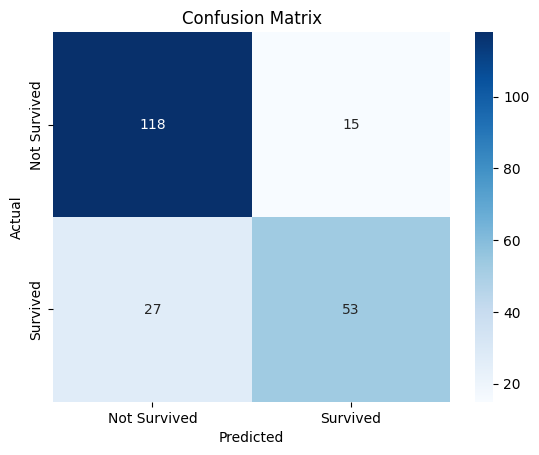

In [42]:
# Confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
print(cm_lg)

# Plotting the confusion matrix
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
feature_coefficients = best_lr.coef_
importance_of_features = feature_coefficients.flatten()
print(importance_of_features)

# Create a dataframe for the coefficients and the respective columns
df_lg = pd.DataFrame(importance_of_features, X.columns)
df_lg

[-0.80500622 -2.52343716 -0.25703707 -0.2082639  -0.14319707  0.21400026
 -0.27131443]


,0
Pclass,-0.805006
Sex,-2.523437
Age,-0.257037
SibSp,-0.208264
Parch,-0.143197
Fare,0.214000
Embarked,-0.271314


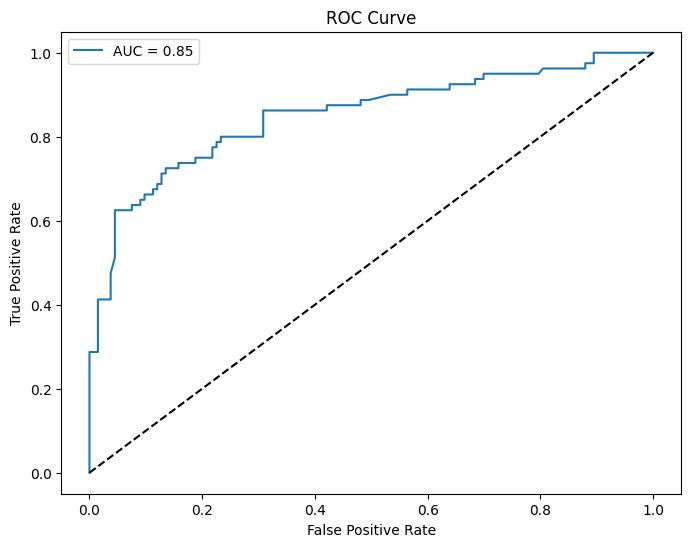

In [44]:
# AUC-ROC Curve
auc = roc_auc_score(y_test, y_pred_test_proba_log_reg)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_log_reg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [45]:
# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'max_iter': 100, 'penalty': 'l2'}


In [46]:
# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

All parameter combinations and their scores:


,params,mean_test_score,std_test_score,rank_test_score
1,"{'max_iter': 100, 'penalty': 'l2'}",0.793939,0.044536,1
5,"{'max_iter': 500, 'penalty': 'l2'}",0.793939,0.044536,1
9,"{'max_iter': 1000, 'penalty': 'l2'}",0.793939,0.044536,1
7,"{'max_iter': 500, 'penalty': None}",0.791919,0.044992,4
11,"{'max_iter': 1000, 'penalty': None}",0.791919,0.044992,4
3,"{'max_iter': 100, 'penalty': None}",0.791919,0.044992,4
2,"{'max_iter': 100, 'penalty': 'elasticnet'}",0.000000,0.000000,7
0,"{'max_iter': 100, 'penalty': 'l1'}",0.000000,0.000000,7
6,"{'max_iter': 500, 'penalty': 'elasticnet'}",0.000000,0.000000,7
4,"{'max_iter': 500, 'penalty': 'l1'}",0.000000,0.000000,7


### __Model creation (Naive bayes)__

In [ ]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setting up the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_test_proba_nb = nb_model.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_nb,
    'Predicted Label': y_pred_test_nb,
})

# Display the first 5 instances in the result dataframe
results_df.head()


Naïve Bayes:
Training Accuracy: 0.7717171717171717
Testing Accuracy: 0.8169014084507042


,Actual Label,Predicted Probability,Predicted Label
147,0,0.703001,1
313,0,0.042125,0
417,1,0.795292,1
251,0,0.609552,1
766,0,0.924427,1


In [ ]:

nb_model

GaussianNB()

In [ ]:
r

NameError: name 'r' is not defined

In [ ]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       133
           1       0.74      0.80      0.77        80

    accuracy                           0.82       213
   macro avg       0.80      0.81      0.81       213
weighted avg       0.82      0.82      0.82       213



In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
cm_nb

Confusion Matrix:


array([[110,  23],
       [ 16,  64]])

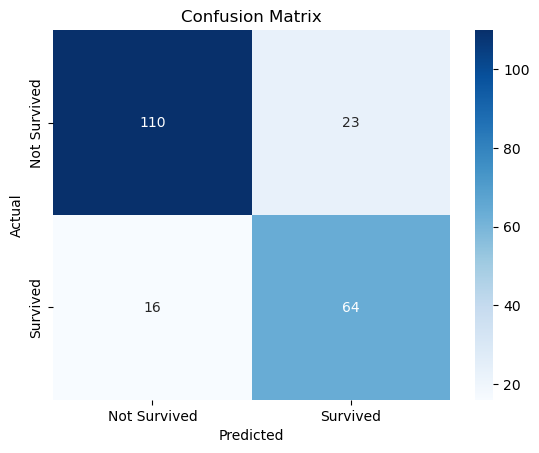

In [ ]:
# Plotting the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_pred_test_proba_nb)
auc

0.837922932330827

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_nb)

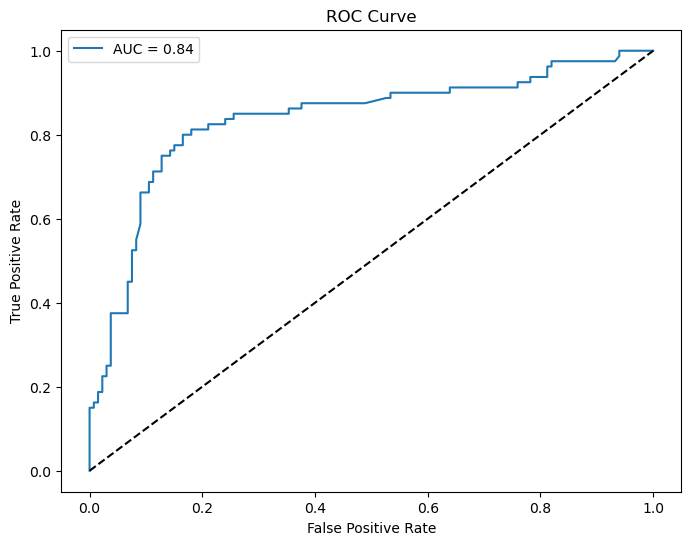

In [ ]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### __Model creation (KNN)__

In [47]:
# Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [48]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,-0.045432,-0.482850,-0.395708,0.719961,2
784,3,1,-0.362924,-0.482850,-0.395708,-0.747714,2
83,1,1,-0.045432,-0.482850,-0.395708,2.266665,2
17,2,1,-0.045432,-0.482850,-0.395708,-0.299885,2
323,2,0,-0.680416,0.700372,0.828513,0.904361,2


In [49]:
scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [50]:
normalizer = Normalizer()

X_train[numerical_columns] = normalizer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = normalizer.transform(X_test[numerical_columns])

In [51]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,-0.047622,-0.506127,-0.414783,0.754668,2
784,3,1,-0.349140,-0.464511,-0.380678,-0.719315,2
83,1,1,-0.019321,-0.205337,-0.168279,0.963922,2
17,2,1,-0.065458,-0.695686,-0.570132,-0.432072,2
323,2,0,-0.434012,0.446742,0.528478,0.576859,2


In [52]:
# Define the parameters for GridSearchCV
param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_knn.fit(X_train, y_train)

# Getting the best estimator
best_knn = grid_search_knn.best_estimator_
print(best_knn)

# Predict on the training and testing set
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nKNN:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_test_proba_knn = best_knn.predict_proba(X_test)[:, 1]

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

KNN:
Training Accuracy: 0.802020202020202
Testing Accuracy: 0.784037558685446


In [53]:
results_df_knn = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_knn,
    'Predicted Label': y_pred_test_knn,
})

# Display the first 5 instances in the result dataframe
results_df_knn.head()

,Actual Label,Predicted Probability,Predicted Label
147,0,0.235294,0
313,0,0.000000,0
417,1,0.941176,1
251,0,0.294118,0
766,0,0.588235,1


In [54]:
best_knn_params = grid_search_knn.best_params_
best_knn_params

{'metric': 'euclidean', 'n_neighbors': 17}

In [55]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       133
           1       0.87      0.50      0.63        80

    accuracy                           0.78       213
   macro avg       0.82      0.73      0.74       213
weighted avg       0.80      0.78      0.77       213



Confusion Matrix:
[[127   6]
 [ 40  40]]


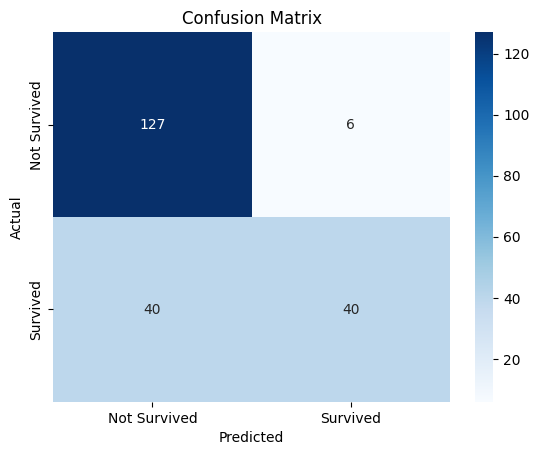

In [56]:
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
print(cm_knn)

# Plotting the confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

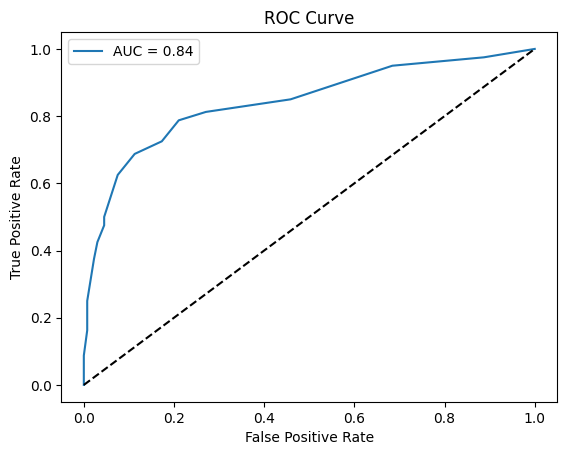

In [57]:
auc = roc_auc_score(y_test, y_pred_test_proba_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_knn)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### __Model Creation (Decision Trees)__

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Setting up the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Defining the parameters for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, error_score=0)
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_dtc = grid_search.best_estimator_

# Predict on the training and testing set
y_pred_train_dtc = best_dtc.predict(X_train)
y_pred_test_dtc = best_dtc.predict(X_test)
y_pred_test_proba_dtc = best_dtc.predict_proba(X_test)[:, 1]

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_dtc)
testing_accuracy = accuracy_score(y_test, y_pred_test_dtc)
print("\nDecision Tree:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Decision Tree:
Training Accuracy: 0.8444444444444444
Testing Accuracy: 0.7934272300469484


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

In [60]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_dtc))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       133
           1       0.85      0.55      0.67        80

    accuracy                           0.79       213
   macro avg       0.81      0.74      0.76       213
weighted avg       0.80      0.79      0.78       213



Confusion Matrix:
[[125   8]
 [ 36  44]]


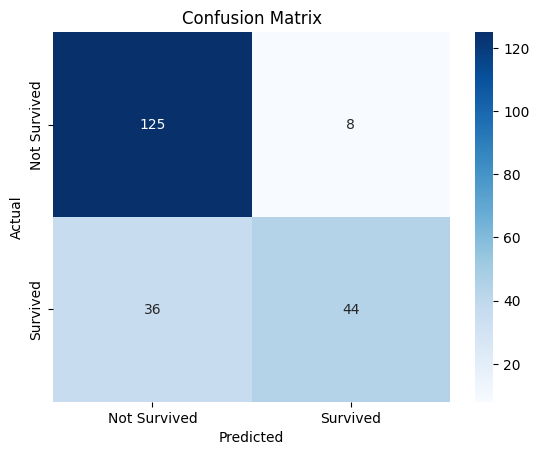

In [61]:
# Confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("Confusion Matrix:")
print(cm_dtc)

# Plotting the confusion matrix
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

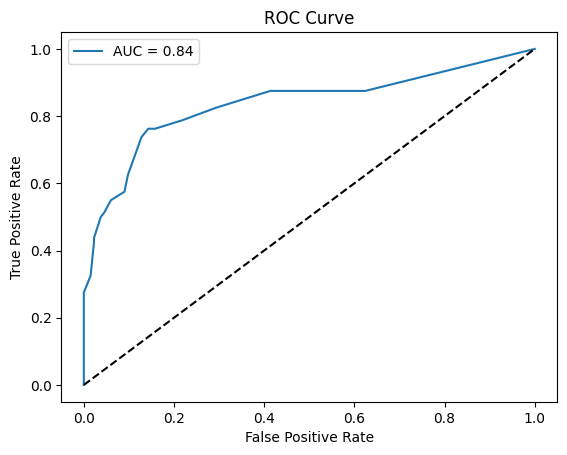

In [62]:
# AUC-ROC
auc = roc_auc_score(y_test, y_pred_test_proba_dtc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_dtc)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [63]:
# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [64]:
# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

All parameter combinations and their scores:


,params,mean_test_score,std_test_score,rank_test_score
445,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.810101,0.024242,1
447,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.810101,0.024242,1
85,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.804040,0.024410,3
87,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.804040,0.024410,3
303,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.800000,0.022496,5
...,...,...,...,...
22,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.000000,0.000000,541
21,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.000000,0.000000,541
20,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.000000,0.000000,541
19,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.000000,0.000000,541


### __Model Creation (Random Forest)__

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Setting up the Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Defining the parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    # 'max_depth': [None, 10, 20, 30, 40],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_rfc = grid_search.best_estimator_

# Predict on the training and testing set
y_pred_train_rfc = best_rfc.predict(X_train)
y_pred_test_rfc = best_rfc.predict(X_test)
y_pred_test_proba_rfc = best_rfc.predict_proba(X_test)[:, 1]

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_rfc)
testing_accuracy = accuracy_score(y_test, y_pred_test_rfc)
print("\nRandom Forest:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Random Forest:
Training Accuracy: 0.9777777777777777
Testing Accuracy: 0.7934272300469484


In [ ]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_rfc))

In [ ]:
# Confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("Confusion Matrix:")
print(cm_rfc)

# Plotting the confusion matrix
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# AUC-ROC
auc = roc_auc_score(y_test, y_pred_test_proba_rfc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_rfc)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
print(results)